In [1]:
import pandas as pd

"""An example notebook for a data_analysis notebook you may write.

Please use the recommended TNR font unless your venue requires otherwise.
"""

# Write down all of your code for data analysis in this file.
# Plot the data and save the figures/tables in the folders "plots" and "tables"
import matplotlib.pyplot as plt
import seaborn as sns

# Use TNR for all figures
# to match paper templates
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = [
    "Times New Roman",
] + plt.rcParams["font.serif"]

# Whitegrid is most appropriate
# for scientific papers
sns.set_style("whitegrid")

# An optional colorblind palette
# for figures
CB_color_cycle = [
    "#377EB8",
    "#FF7F00",
    "#4DAF4A",
    "#F781BF",
    "#A65628",
    "#984EA3",
    "#999999",
    "#E41A1C",
    "#DEDE00",
]

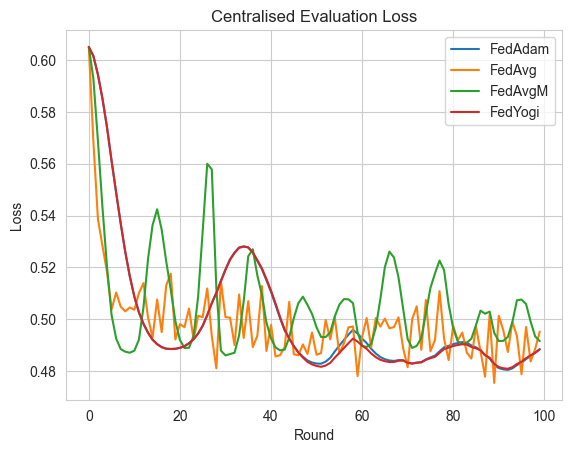

In [21]:
import pandas as pd

fedadam = pd.read_csv("rnn_fedadam.csv").iloc[:100]
fedavg = pd.read_csv("rnn_fedavg.csv").iloc[:100]
fedavgm = pd.read_csv("rnn_fedavgm.csv").iloc[:100]
fedyogi = pd.read_csv("rnn_fedyogi.csv").iloc[:100]
rounds = range(100)

plt.title("Centralised Evaluation Loss")
plt.plot(rounds, fedadam[fedadam.columns[1]], label="FedAdam")
plt.plot(rounds, fedavg[fedavg.columns[1]], label="FedAvg")
plt.plot(rounds, fedavgm[fedavgm.columns[1]], label="FedAvgM")
plt.plot(rounds, fedyogi[fedyogi.columns[1]], label="FedYogi")
plt.legend()
plt.xlabel("Round")
plt.ylabel("Loss")
plt.savefig("evaluation_loss.svg")
plt.show()

In [266]:
import json

def load_history(curr_day, output_name):
    output_dir = f"../outputs/{curr_day}/{output_name}"
    with open(f"{output_dir}/results/state/histories/history.json") as f: 
        return json.load(f)

history = load_history(curr_day="2024-03-24", output_name="20-57-17")
history.keys()

dict_keys(['losses_distributed', 'losses_centralized', 'metrics_distributed_fit', 'metrics_distributed', 'metrics_centralized', 'use_wandb'])

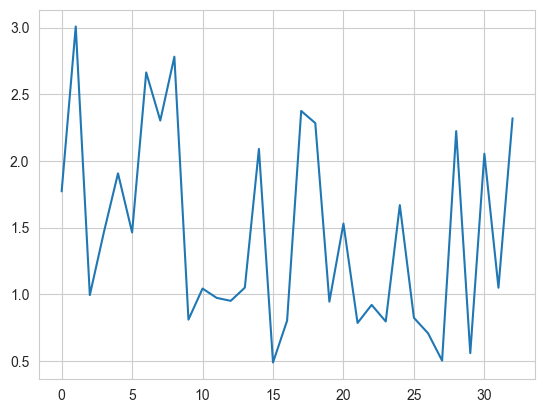

In [275]:
plt.plot([val[1] for val in history["losses_distributed"]])

In [23]:
from pathlib import Path
import natsort
import torch
import os

PARTITION_DIR = Path("../data/foursquare/partition")

def get_dirs(path):
    absolute_paths = [Path(path / name) for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]
    return natsort.natsorted(absolute_paths)

def get_clients(client_dirs):
    clients = {}
    for c_path in client_dirs:
        train_tensor = torch.load(c_path / "train.pt")
        test_tensor = torch.load(c_path / "test.pt")
        clients[c_path.name] = {"train": train_tensor, "test": test_tensor}
    return clients

In [42]:
client_dirs = get_dirs(PARTITION_DIR)
clients = get_clients(client_dirs)
print(f"Loaded {len(clients)} client partitions.")

Loaded 10 client partitions.


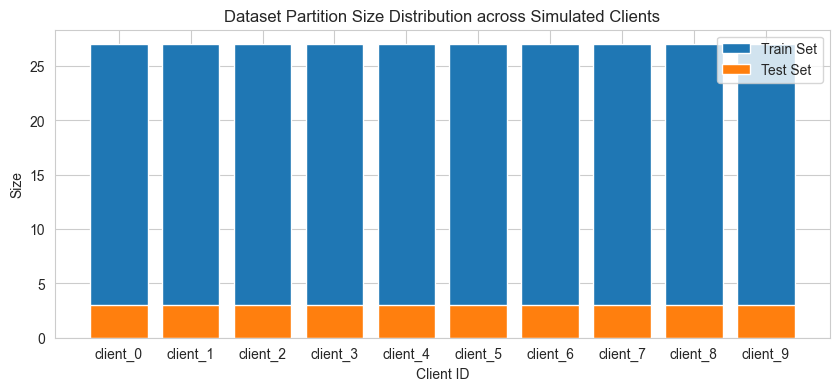

In [46]:
train_len, test_len = [], []
for c in clients.values():
    train_len.append(len(c["train"]))
    test_len.append(len(c["test"]))

fig = plt.figure(figsize=(10, 4))
plt.bar(clients.keys(), train_len, label="Train Set")
plt.bar(clients.keys(), test_len, label="Test Set")
plt.title("Dataset Partition Size Distribution across Simulated Clients")
plt.xlabel("Client ID")
plt.ylabel("Size")
plt.legend()
plt.savefig("sizes.svg")
plt.show()

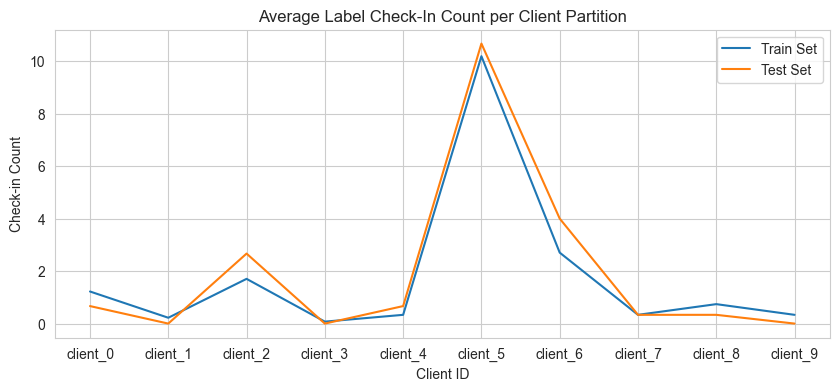

In [45]:
train_avg, test_avg = [], []
for c in clients.values():
    sum_label = 0
    for sequences, label in c["train"]:
        sum_label += label
    avg_label = sum_label / len(c["train"])
    train_avg.append(avg_label)
    
    sum_label = 0
    for sequences, label in c["test"]:
        sum_label += label
    avg_label = sum_label / len(c["test"])
    test_avg.append(avg_label)
    
fig = plt.figure(figsize=(10, 4))
plt.plot(clients.keys(), train_avg, label="Train Set")
plt.plot(clients.keys(), test_avg, label="Test Set")
plt.title("Average Label Check-In Count per Client Partition")
plt.xlabel("Client ID")
plt.ylabel("Check-in Count")
plt.legend()
plt.savefig("label_avg.svg")
plt.show()

In [262]:
from torch.utils.data import DataLoader

loader = DataLoader(clients["client_4"]["train"], batch_size=1, shuffle=False)
print(len(loader))
for sequences, label in loader:
    print(sequences, label)
    break

21
tensor([[[ 4.0947e+01, -7.4073e+01,  0.0000e+00,  1.0000e+00, -1.6057e-01,
          -9.8702e-01,  4.0000e+00],
         [ 4.0947e+01, -7.4073e+01,  0.0000e+00,  1.0000e+00, -2.7798e-01,
          -9.6059e-01,  1.0000e+00],
         [ 4.0947e+01, -7.4073e+01,  0.0000e+00,  1.0000e+00, -3.9136e-01,
          -9.2024e-01,  0.0000e+00],
         [ 4.0947e+01, -7.4073e+01,  0.0000e+00,  1.0000e+00, -4.9907e-01,
          -8.6656e-01,  0.0000e+00],
         [ 4.0947e+01, -7.4073e+01,  0.0000e+00,  1.0000e+00, -5.9955e-01,
          -8.0034e-01,  0.0000e+00],
         [ 4.0947e+01, -7.4073e+01,  0.0000e+00,  1.0000e+00, -6.9135e-01,
          -7.2252e-01,  0.0000e+00],
         [ 4.0947e+01, -7.4073e+01,  0.0000e+00,  1.0000e+00, -7.7314e-01,
          -6.3424e-01,  0.0000e+00],
         [ 4.0947e+01, -7.4073e+01,  0.0000e+00,  1.0000e+00, -8.4373e-01,
          -5.3677e-01,  0.0000e+00],
         [ 4.0947e+01, -7.4073e+01,  0.0000e+00,  1.0000e+00, -9.0210e-01,
          -4.3153e-01,  0.

In [263]:
federated_testset = torch.load(PARTITION_DIR / "test.pt")
len(federated_testset)

4466

In [264]:
for sequences, label in federated_testset:
    print(sequences, label)
    break

tensor([[ 4.0680e+01, -7.3984e+01,  0.0000e+00,  1.0000e+00,  9.9339e-01,
         -1.1479e-01,  5.0000e+00],
        [ 4.0680e+01, -7.3984e+01,  0.0000e+00,  1.0000e+00,  9.7241e-01,
         -2.3329e-01,  6.0000e+00],
        [ 4.0680e+01, -7.3984e+01,  0.0000e+00,  1.0000e+00,  9.3734e-01,
         -3.4841e-01,  3.0000e+00],
        [ 4.0680e+01, -7.3984e+01,  0.0000e+00,  1.0000e+00,  8.8870e-01,
         -4.5849e-01,  3.0000e+00],
        [ 4.0680e+01, -7.3984e+01,  0.0000e+00,  1.0000e+00,  8.2719e-01,
         -5.6192e-01,  8.0000e+00],
        [ 4.0680e+01, -7.3984e+01,  0.0000e+00,  1.0000e+00,  7.5370e-01,
         -6.5722e-01,  6.0000e+00],
        [ 4.0680e+01, -7.3984e+01,  0.0000e+00,  1.0000e+00,  6.6929e-01,
         -7.4300e-01,  0.0000e+00],
        [ 4.0680e+01, -7.3984e+01,  0.0000e+00,  1.0000e+00,  5.7519e-01,
         -8.1802e-01,  1.0000e+00],
        [ 4.0680e+01, -7.3984e+01,  0.0000e+00,  1.0000e+00,  4.7276e-01,
         -8.8119e-01,  0.0000e+00],
        [ 